In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from hyperopt.plotting import main_plot_history

In [2]:
# load and split the dataset
X, y = load_breast_cancer(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [3]:
# scale data
X_train = preprocessing.MinMaxScaler().fit(X_train).transform(X_train)
X_test = preprocessing.MinMaxScaler().fit(X_test).transform(X_test)

## KNN

In [4]:
# fit KNN with default sklearn parameters and measure accuracy
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
predicted_knn = knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, predicted_knn)
print(f'Accuracy Score KNN: {accuracy_knn:.3}')

Accuracy Score KNN: 0.947


In [5]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [6]:
# KNN search space
space_knn = {
    'n_neighbors': hp.choice('n_neighbors', range(1,100)),
    'weights' : hp.choice('weights', ['uniform', 'distance']),
    'metric' : hp.choice('metric', ['euclidean', 'manhattan', 'chebyshev', 'minkowski']),
}

In [7]:
#define the objective function
def objective(params):
    knn = KNeighborsClassifier(**params)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    return {'loss': -acc, 'status': STATUS_OK}

In [8]:
%%time

# run the HPO process to find the best suited hyperparameters and store the trials results
trials_knn = Trials()
best_knn = fmin(objective, space_knn, algo=tpe.suggest, trials=trials_knn, max_evals=200)
print('Best Parameters Hyperopt for KNN:', best_knn)

100%|██████████| 200/200 [00:20<00:00,  9.54trial/s, best loss: -0.9766081871345029]
Best Parameters Hyperopt for KNN: {'metric': 1, 'n_neighbors': 66, 'weights': 1}
CPU times: total: 46.9 s
Wall time: 21 s


In [9]:
# fit KNN with the parameters Hyperopt chose and measure accuracy
knn_hp = KNeighborsClassifier(n_neighbors=66, metric='manhattan', weights='distance')
knn_hp.fit(X=X_train, y=y_train)
predicted_knn_hp = knn_hp.predict(X_test)

accuracy_knn_hp = accuracy_score(y_test, predicted_knn_hp)
print(f'Accuracy Score Hyperopt KNN: {accuracy_knn_hp:.3}')

Accuracy Score Hyperopt KNN: 0.971


avg best error: -0.9766081871345029


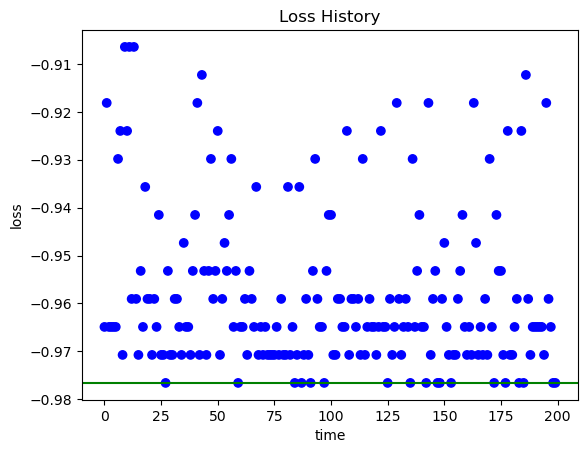

In [10]:
# visualize points and function evaluation results
main_plot_history(trials_knn)

# RF

In [11]:
# fit RF with default sklearn parameters and measure accuracy
rf = RandomForestClassifier()
rf.fit(X=X_train, y=y_train)
predicted_rf = rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, predicted_rf)
print(f'Accuracy Score RF: {accuracy_rf:.3}')

Accuracy Score RF: 0.918


In [12]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [13]:
#define the objective function
def objective(params):
    rf = RandomForestClassifier(**params)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    return {'loss': -acc, 'status': STATUS_OK}

In [14]:
# RF search space
space_rf = {
    'n_estimators': hp.choice('n_estimators', range(1, 150)),
    'max_features': hp.choice('max_features', [None, 'sqrt', 'log2']),
}

In [15]:
%%time

# run the HPO process to find the best suited hyperparameters and store the trials results
trials_rf = Trials()
best_rf = fmin(objective, space_rf, algo=tpe.suggest, trials=trials_rf, max_evals=200)
print('Best Parameters Hyperopt for RF:', best_rf)

100%|██████████| 200/200 [00:34<00:00,  5.75trial/s, best loss: -0.9473684210526315]
Best Parameters Hyperopt for RF: {'max_features': 1, 'n_estimators': 26}
CPU times: total: 29.7 s
Wall time: 34.8 s


In [16]:
# fit RF with the parameters Hyperopt chose and measure accuracy
rf_hp = RandomForestClassifier(n_estimators=26, max_features='sqrt') 
rf_hp.fit(X=X_train, y=y_train)
predicted_rf_hp = rf_hp.predict(X_test)

accuracy_rf_hp = accuracy_score(y_test, predicted_rf_hp)
print(f'Accuracy Score Hyperopt RF: {accuracy_rf_hp:.3}')

Accuracy Score Hyperopt RF: 0.901


avg best error: -0.9473684210526315


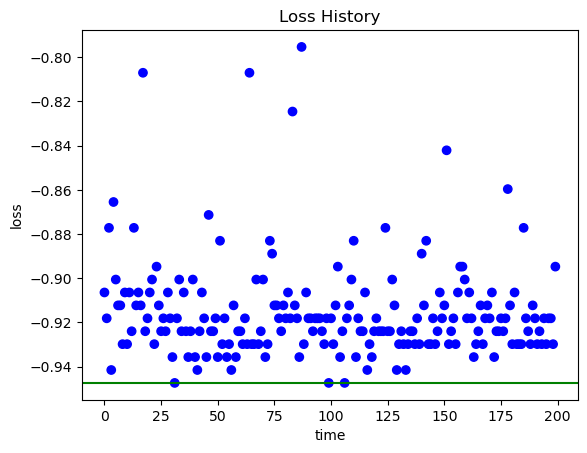

In [17]:
# visualize points and function evaluation results
main_plot_history(trials_rf)

# LR

In [18]:
# fit LR with default sklearn parameters and measure accuracy
lr = LogisticRegression(multi_class='auto')
lr.fit(X_train, y_train)
predicted_lr = lr.predict(X_test)

accuracy_lr = accuracy_score(y_test, predicted_lr)
print(f'Accuracy Score LR: {accuracy_lr:.3}')

Accuracy Score LR: 0.947


In [19]:
lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [20]:
# LR search space
space_lr = {
    'C': hp.uniform('C',0.01, 100),
    'solver':  hp.choice(
        'solver',
        [
            {'solver':'newton-cg', 'penalty': 'l2', 'l1_ratio': None},
            {'solver':'lbfgs', 'penalty': 'l2', 'l1_ratio': None},
            {'solver': 'liblinear', 'penalty': hp.choice('p_liblinear',['l1','l2']), 'l1_ratio': None}, 
            {'solver': 'sag', 'penalty': 'l2', 'l1_ratio': None},
            {'solver':'saga', 'penalty':'elasticnet', 'l1_ratio': hp.uniform('l1_saga', 0, 1)},
        ],),
    'tol': hp.uniform('tol',0.00001, 0.0001),
}

In [21]:
#define the objective function
def objective(space):
    solver=space['solver']['solver']
    penalty=space['solver']['penalty']
    l1_ratio=space['solver']['l1_ratio']
    clf=LogisticRegression(penalty=penalty, C=space['C'], solver=solver, tol=space['tol'], l1_ratio=l1_ratio, max_iter=15000)
    clf.fit(X_train, y_train)
    acc=clf.score(X_test,y_test)
    return {'loss': -acc, 'status': STATUS_OK}

In [22]:
%%time
# run the HPO process to find the best suited hyperparameters and store the trials results

trials_lr = Trials()
best_lr = fmin(objective, space_lr, algo=tpe.suggest, trials=trials_lr, max_evals=200)
print('Best Parameters Hyperopt for LR:', best_lr)

100%|██████████| 200/200 [00:24<00:00,  8.05trial/s, best loss: -0.9766081871345029]
Best Parameters Hyperopt for LR: {'C': 0.15123923048288407, 'solver': 1, 'tol': 2.5555767269427164e-05}
CPU times: total: 36.5 s
Wall time: 24.9 s


In [23]:
# fit LR with the parameters Hyperopt chose and measure accuracy
lr_hp = LogisticRegression(C=0.15123923048288407, penalty='l2', solver='lbfgs', tol=2.5555767269427164e-05)
lr_hp.fit(X=X_train, y=y_train)
predicted_lr_hp = lr_hp.predict(X_test)

accuracy_lr_hp = accuracy_score(y_test, predicted_lr_hp)
print(f'Accuracy Score Hyperopt LR: {accuracy_lr_hp:.3}')

Accuracy Score Hyperopt LR: 0.977


avg best error: -0.9766081871345029


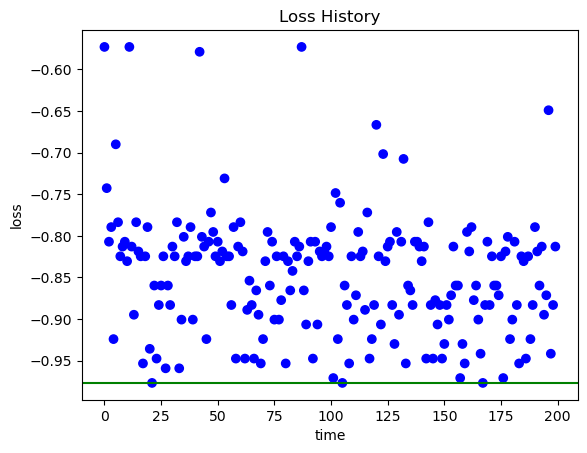

In [24]:
# visualize points and function evaluation results
main_plot_history(trials_lr)

# SVM

In [25]:
# fit SVM with default sklearn parameters and measure accuracy
svm = SVC()
svm.fit(X=X_train, y=y_train)
predicted_svm = svm.predict(X_test)

accuracy_svm = accuracy_score(y_test, predicted_svm)
print(f'Accuracy Score SVM: {accuracy_svm:.3}')

Accuracy Score SVM: 0.93


In [26]:
svm.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [27]:
# SVM search space
space_svm = {
    'C': hp.uniform('C', 0.0, 20.0),
    'kernel': hp.choice('kernel', ['linear', 'poly', 'rbf', 'sigmoid']),
}

In [28]:
# define the objective function
def objective(params):
    svm = SVC(**params)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    return {'loss': -acc, 'status': STATUS_OK}

In [29]:
%%time

# run the HPO process to find the best suited hyperparameters and store the trials results
trials_svm = Trials()
best_svm = fmin(objective, space_svm, algo=tpe.suggest, trials=trials_svm, max_evals=200)
print('Best Parameters Hyperopt for SVM:', best_svm)

100%|██████████| 200/200 [00:01<00:00, 149.84trial/s, best loss: -0.9824561403508771]
Best Parameters Hyperopt for SVM: {'C': 0.0802028410864925, 'kernel': 0}
CPU times: total: 1.17 s
Wall time: 1.34 s


In [30]:
# fit SVM with the parameters Hyperopt chose and measure accuracy
svm_hp = SVC(C=0.0802028410864925, kernel='linear')
svm_hp.fit(X=X_train, y=y_train)
predicted_svm_hp = svm_hp.predict(X_test)

accuracy_svm = accuracy_score(y_test, predicted_svm_hp)
print(f'Accuracy Score Hyperopt SVM: {accuracy_svm:.3}')

Accuracy Score Hyperopt SVM: 0.982


avg best error: -0.9824561403508771


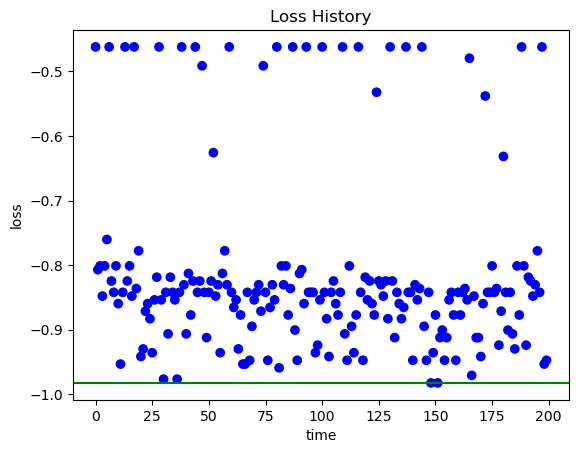

In [31]:
# visualize points and function evaluation results
main_plot_history(trials_svm)

# NB

In [32]:
# fit NB with default sklearn parameters and measure accuracy
nb = MultinomialNB()
nb.fit(X=X_train, y=y_train)
predicted_nb = nb.predict(X_test)

accuracy_nb = accuracy_score(y_test, predicted_nb)
print(f'Accuracy Score NB: {accuracy_nb:.3}')

Accuracy Score NB: 0.848


In [33]:
nb.get_params()

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True, 'force_alpha': True}

In [34]:
# NB search space
space_nb = {
    'alpha': hp.uniform('alpha', 0.0, 1.5),
}

In [35]:
#define the objective function
def objective(params):
    nb = MultinomialNB(**params)
    nb.fit(X_train, y_train)
    y_pred = nb.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    return {'loss': -acc, 'status': STATUS_OK}

In [36]:
%%time

# run the HPO process to find the best suited hyperparameters and store the trials results
trials_nb = Trials()
best_nb = fmin(objective, space_nb, algo=tpe.suggest, trials=trials_nb, max_evals=200)
print('Best Parameters Hyperopt for NB:', best_nb)

100%|██████████| 200/200 [00:00<00:00, 333.79trial/s, best loss: -0.8538011695906432]
Best Parameters Hyperopt for NB: {'alpha': 0.1536907524782064}
CPU times: total: 469 ms
Wall time: 602 ms


In [37]:
# fit NB with the parameters Hyperopt chose and measure accuracy
nb_hp = MultinomialNB(alpha=0.1536907524782064)
nb_hp.fit(X=X_train, y=y_train)
predicted_nb_hp = nb_hp.predict(X_test)

accuracy_nb = accuracy_score(y_test, predicted_nb_hp)
print(f'Accuracy Score Hyperopt SVM: {accuracy_nb:.3}')

Accuracy Score Hyperopt SVM: 0.854


avg best error: -0.8538011695906432


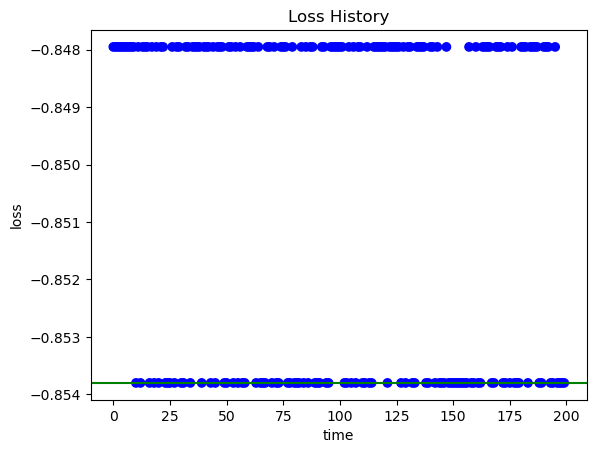

In [38]:
# visualize points and function evaluation results
main_plot_history(trials_nb)